In [2]:
#my version
import tensorflow as tf
from tensorflow import keras
#layers for NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
#oretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.11.0


# Part 1 getting neural netowkr working
Training neural network similar to sklearn models but a bit more complicated. Lets use the titanic dataset we used before

In [3]:
#raw url to get csv
df = pd.read_csv('https://raw.githubusercontent.com/CUNYTechPrep/2020-fall-data-science/master/Week5-RandomForest/data/titanic.csv')

df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)
selected_features = ['fare', 'age', 'sex_male', 'pclass_2', 'pclass_3', 'sibsp', 'parch', 'embarked_Q', 'embarked_S']
df['age'] = df['age'].fillna(999)

X = df[selected_features]

y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Length of our training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)
df.head()

Length of our training data: (712, 9) 
Length of our Testing data: (179,)


,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


Neural networks are made of layers with the layers themselves made up of neurons<br>
Input layer - Multiple hidden layers - Output layer<br>

We will build our own networks layer with sequential fcn.<br>
Layers contain the actual neurosn are called Dense layers in tensorflow. TO get a deep network, we need more dense layers. For a wide network, add more neurons in each layer.<br>
Tensorflow expects 2 params for dense layers. 1st is num of neurons. Good fit is between 64-1024 starting point.<br>
Other param is activationf csn. These are important, for now set to relu.<br>
Last dense layer is the output layer. Num of neurons should be equal to num of classes we want to predict (in our case, we have two class to predict which is whether or not passenger survived).<br>
If problem has two clases (like our example) put 1 and set activation to sigmoid. If problem is multiclass with N classes, set the num to be N and activation to softmax.<br>

In [4]:
# decisiontree = DecisionTree()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

next up, compile the model PRIOR to training it. Three params, optimizer, loss fcn, metrics.<br>
multiple Optimizers , each has different params that can be changed. tf.keras.optimizer.Adam() is good choice for most problems.<br>
Loss fcn depends on problem. Binary class, use binary_crossentropy. Multiclass problem, use sparse_categorical_crossentropy. Regression, use mse.<br>
Metric is what metric we want the model to report while training. We can use accuracy. For regression problem, use mse or mae.<br>

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
#compile fcn operates inpalce, we dont retrun the model. Remember fit from sklearn

now we can train. Depends what we want to do. Pass training and test set like usualm but define number of epochs. How long we want the model to train

In [6]:
epoch = 100
model.fit(X_train, y_train, epochs=epoch, validation_split=0.1)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 5.7056 - acc: 0.6250 - val_loss: 0.9497 - val_acc: 0.5556
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0186 - acc: 0.5469 - val_loss: 1.5223 - val_acc: 0.5694
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0112 - acc: 0.6578 - val_loss: 1.0070 - val_acc: 0.5972
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8379 - acc: 0.6844 - val_loss: 1.1521 - val_acc: 0.6111
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8431 - acc: 0.6734 - val_loss: 0.8765 - val_acc: 0.6806
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8899 - acc: 0.6672 - val_loss: 1.1519 - val_acc: 0.6944
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7200 - acc: 0.6891 - val_loss: 1.1656 - val_acc: 0.6806
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8624 - 

In [7]:
#evaluate model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5131 - acc: 0.8212


[0.5131254196166992, 0.8212290406227112]

we can tinker with model but not much improvement since neural networks are very data hungry. Less than 1000 examples, our dataset is not big enough. No strict num on a good amount of data but at least 10k+ examples is good. <br>
100k is much better and best models use traning sets in the millions. Neural networks most useful for image recognition or NLP, not usually with traditional data set like titanic.

# Part 2 image recognition with convolutional neural networks
We will use keras load_data() fcn to read in data and it can convienently split into train and test data.

In [8]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

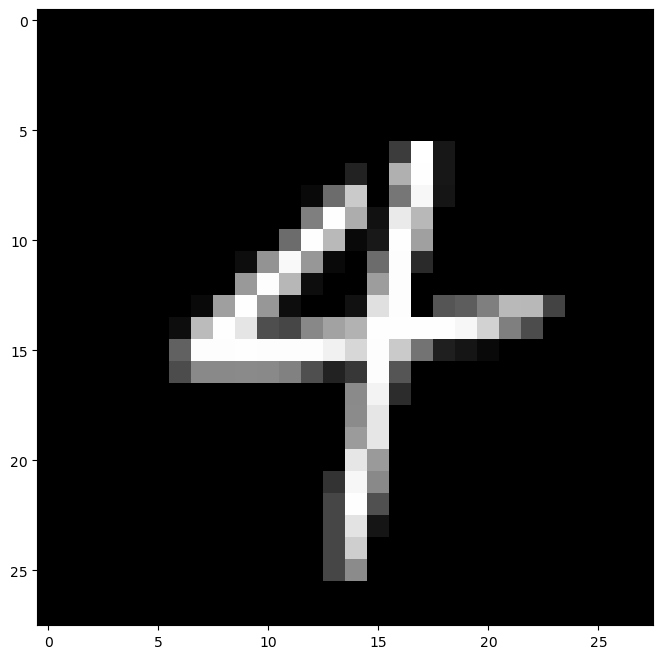

In [11]:
# view images to ensure it looks good and set size of plot
plt.figure(figsize=(8,8))

#one image
img = x_train[590]

#reshaoe to the 28x28 matrix
img = img.reshape(28,28)

#plot reshaped image
plt.imshow(img, cmap='gray')

In [12]:
x_train #checking

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train #test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
x_train = x_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)

In [16]:
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1)

Convolutional layers apply filters to image to transform input. Exact filters are learned throughout training.<br>
Build model same way, add layers. to make a CNN, add the convolutional layers at beginning and some MaxPooling layers which combine output of previous convolutional layers.<br>
First layer needs an input_shape with input of our image, kernel_size is almost always (3,3).

In [17]:
model = tf.keras.models.Sequential()
#start with some conv2D layers alternating with some maxPool layers
#filter size inc. add chunks of conv2D and MaxPool up to 4 groups
model.add(tf.keras.layers.Conv2D(input_shape=(28,28, 1),filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))

model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

#need to flatten layer before going into dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
epochs = 6
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/6
1688/1688 [==============================] - 42s 24ms/step - loss: 0.1504 - acc: 0.9531 - val_loss: 0.0627 - val_acc: 0.9815
Epoch 2/6
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0543 - acc: 0.9837 - val_loss: 0.0350 - val_acc: 0.9898
Epoch 3/6
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0389 - acc: 0.9892 - val_loss: 0.0352 - val_acc: 0.9908
Epoch 4/6
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0310 - acc: 0.9909 - val_loss: 0.0441 - val_acc: 0.9888
Epoch 5/6
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0279 - acc: 0.9919 - val_loss: 0.0364 - val_acc: 0.9903
Epoch 6/6
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0220 - acc: 0.9935 - val_loss: 0.0335 - val_acc: 0.9913


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0270 - acc: 0.9928


[0.02695588394999504, 0.9927999973297119]

# part 3 transfer learning
If asked to train an image classifier tomorrow, we would use transfer learning. Idea is to make use of models that other orgs have trained for a long time on a bunch of data. Can download their weights and add layers on end for our purpose.<br>
Can follow this: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a <br>
First, use new data set, we can use cifar10 data set, classic benchmark: https://www.cs.toronto.edu/~kriz/cifar.html

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train = x_train.reshape(-1, 32, 32, 3)
y_train = y_train.reshape(-1)
x_test = x_test.reshape(-1, 32, 32, 3)
y_test = y_test.reshape(-1)

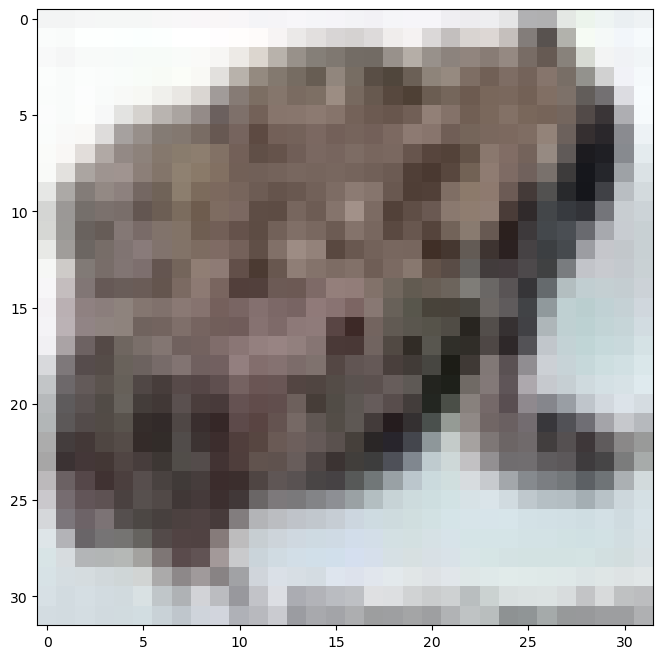

In [25]:
# view images
plt.figure(figsize=(8,8))

#select one image
img = x_train[326]

#reshape img to 28x28 matrix
img = img.reshape(32,32,3)

#plot reshaped image
plt.imshow(img, cmap='gray')

In [28]:
#making some tweaks to input shape but overal using same model to benchmark
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(32,32, 3),filters=32,kernel_size=(3,3), strides=(1,1), activation="relu")) #change here!!
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu")) #here too

model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu")) #filter values here as well
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

#need to flatten layer before going into dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) #add this
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) #and here
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])
#can we do other metrics besides accuracy?
epochs = 15
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 92s 65ms/step - loss: 1.6027 - acc: 0.4002 - val_loss: 1.1896 - val_acc: 0.5716
Epoch 2/15
1407/1407 [==============================] - 91s 64ms/step - loss: 1.1375 - acc: 0.5974 - val_loss: 0.9469 - val_acc: 0.6642
Epoch 3/15
1407/1407 [==============================] - 90s 64ms/step - loss: 0.9312 - acc: 0.6758 - val_loss: 0.8643 - val_acc: 0.6976
Epoch 4/15
1407/1407 [==============================] - 90s 64ms/step - loss: 0.8053 - acc: 0.7224 - val_loss: 0.7796 - val_acc: 0.7336
Epoch 5/15
1407/1407 [==============================] - 90s 64ms/step - loss: 0.7214 - acc: 0.7491 - val_loss: 0.7604 - val_acc: 0.7366
Epoch 6/15
1407/1407 [==============================] - 90s 64ms/step - loss: 0.6425 - acc: 0.7779 - val_loss: 0.7239 - val_acc: 0.7548
Epoch 7/15
1407/1407 [==============================] - 90s 64ms/step - loss: 0.5804 - acc: 0.8000 - val_loss: 0.7429 - val_acc: 0.7540
Epoch 8/15
1407/1407 [==========================

In [29]:
#evaluating our from-scratch CNN model
print('scratch CNN accuracy', model.evaluate(x_test, y_test)[1])
#75% accuracy pretty good for classificatio problem with 10 classes. 

313/313 [==============================] - 4s 13ms/step - loss: 0.9482 - acc: 0.7429
scratch CNN accuracy 0.742900013923645


In [30]:
#Now for transfer model lets create validation set to use
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [33]:
input_shape = (32, 32, 3)

#load the model
vgg = vgg19.VGG19(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)

#freeze bottom layers and print them out
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

80134624/80134624 [==============================] - 2s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x00000238B5B14100>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x00000238B5B14460>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002389E319370>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000238B5B1AA30>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002389E34BEB0>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x00000238B5B1A250>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000238B5B24310>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x00000238B5B1A2E0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x00000238B5B246D0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002389E2181C0>,block3_conv3,False


In [34]:
#we can use the vgg model as a feature extractor, we can use it to make predictions and then store them and feed into our own models
train_features_vgg = vgg_model.predict(x_train)
validation_features_vgg = vgg_model.predict(x_val)
test_features_vgg = vgg_model.predict(x_test)

313/313 [==============================] - 27s 85ms/step


In [35]:
input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(Dense(256, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
epochs=20
model.fit(train_features_vgg, y_train, validation_data=(validation_features_vgg, y_val), epochs=epochs)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5528 - accuracy: 0.4472 - val_loss: 1.3199 - val_accuracy: 0.5300
Epoch 2/20
1265/1407 [=========================>....] - ETA: 0s - loss: 1.3628 - accuracy: 0.5188

KeyboardInterrupt: 